In [106]:
import pandas as pd
import numpy as np
df=pd.read_csv('Know.csv')
df.head()

,Article number,Article Title,Last Update,Time Updated,Active,Article type,Knowledge Author,University Service,Attachment link,Keywords,Views count
0,KB0019498,NYU Drive (Google): Message for IT Service Des...,2022-03-15,15:05:12,True,HTML,Kenneth Drake-Sargent,NYU Drive (Google),False,Storage Reduction Quota Google Drive NYU Resea...,12
1,KB0019353,Access to Google Scholar,2021-11-12,12:21:15,True,HTML,Kenneth Drake-Sargent,NYU Email (Google),False,Google Scholar access links blocked,297
2,KB0019341,NYU Groups: Addressing members with a bouncing...,2021-10-21,14:32:27,True,HTML,Anthony M,NYU Groups (Google),False,NYU Groups Group Bouncing Status Settings,12
3,KB0019132,NYU Google Apps: What uses your storage space,2021-06-16,17:04:50,True,HTML,Kenneth Drake-Sargent,NYU Google Apps,False,storage quota drive email mail google,88
4,KB0019131,"NYU Google Apps: Tips for Reducing NYU Drive, ...",2021-06-16,16:51:04,True,HTML,Kenneth Drake-Sargent,NYU Google Apps,False,drive google email storage quota,1123


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Article number      405 non-null    object
 1   Article Title       403 non-null    object
 2   Last Update         405 non-null    object
 3   Time Updated        405 non-null    object
 4   Active              405 non-null    bool  
 5   Article type        405 non-null    object
 6   Knowledge Author    405 non-null    object
 7   University Service  405 non-null    object
 8   Attachment link     405 non-null    bool  
 9   Keywords            391 non-null    object
 10  Views count         405 non-null    int64 
dtypes: bool(2), int64(1), object(8)
memory usage: 29.4+ KB


In [97]:
print('The total number of KBs about Google services is: ', df.size/11)

The total number of KBs about Google services is:  405.0


In [41]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [42]:
df.columns = df.columns.str.replace('Last Update', 'TIME')

In [43]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [45]:
counts = pd.Series(index=df.TIME, data=np.array(df.count)).resample('30D').count()
print('Bins of 30 days: quantity of last updates each month')
print(counts[:1000])

Bins of 30 days: quantity of last updates each month
TIME
2020-04-20     39
2020-05-20      0
2020-06-19      0
2020-07-19      0
2020-08-18      0
2020-09-17      1
2020-10-17    259
2020-11-16     54
2020-12-16      3
2021-01-15      0
2021-02-14      1
2021-03-16      0
2021-04-15      3
2021-05-15      1
2021-06-14      3
2021-07-14      0
2021-08-13      1
2021-09-12     14
2021-10-12      2
2021-11-11      9
2021-12-11      0
2022-01-10      4
2022-02-09      7
2022-03-11      4
Freq: 30D, dtype: int64


In [38]:
print('this is the oldest update:', min(df['TIME']))

this is the oldest update: 2020-04-20 00:00:00


In [48]:
df.columns = df.columns.str.replace('Time Updated', 'TIME2')

In [50]:
df['TIME2'] = pd.to_datetime(df['TIME2'])

In [53]:
counts = pd.Series(index=df.TIME2, data=np.array(df.count)).resample('1H').count()
print('Times in which we usually update (do not pay attention to the date)')
print(counts[:1000])

Times in which we usually update (do not pay attention to the date)
TIME2
2022-04-07 08:00:00      1
2022-04-07 09:00:00      1
2022-04-07 10:00:00      3
2022-04-07 11:00:00     42
2022-04-07 12:00:00     12
2022-04-07 13:00:00     16
2022-04-07 14:00:00    256
2022-04-07 15:00:00     22
2022-04-07 16:00:00      9
2022-04-07 17:00:00      9
2022-04-07 18:00:00      6
2022-04-07 19:00:00     14
2022-04-07 20:00:00      3
2022-04-07 21:00:00      0
2022-04-07 22:00:00      5
2022-04-07 23:00:00      6
Freq: H, dtype: int64


In [57]:
print('The minimun of views from an article was:', min(df['Views count']), ', while max:', max(df['Views count']))

The minimun of views from an article was: 0 , while max: 144841


In [73]:
maxg=df['Views count'].max()
print('In bins of 500 views and from 2000 to max, we have: ')
width=100
bins1=list(range(0,2000,500))
bins= bins1 + [2000, maxg]
pd.cut(df['Views count'],bins).value_counts()

In bins of 500 views and from 2000 to max, we have: 


(0, 500]          288
(500, 1000]        39
(2000, 144841]     35
(1000, 1500]       15
(1500, 2000]        8
Name: Views count, dtype: int64

<AxesSubplot:title={'center':'Distribution of KBs into each service'}, ylabel='University Service'>

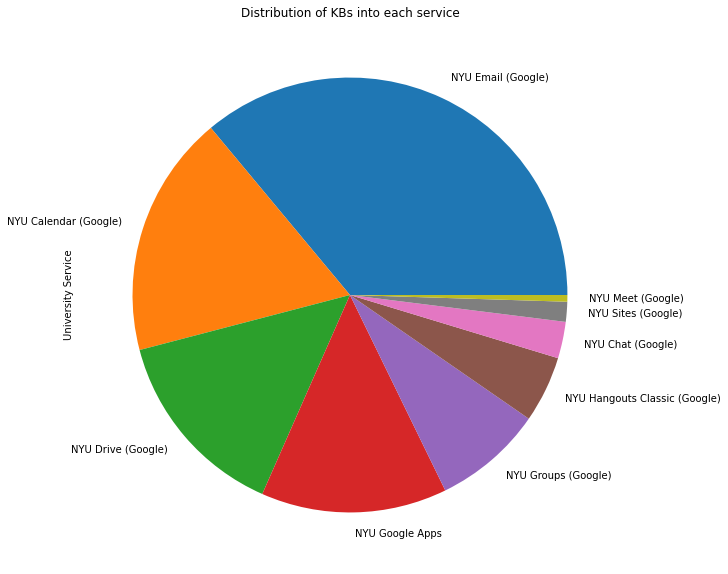

In [84]:
df['University Service'].value_counts().plot.pie(figsize=(10, 10), title='Distribution of KBs into each service')

In [85]:
print('196 of them start with KB, while the other 210 start with a number')

196 of them start with KB, while the other 210 start with a number


In [87]:
df['Keywords'] = df["Keywords"].map(str)

In [91]:
from collections import Counter
print('Hundred most common words on keywords section on our KBs')
Counter(" ".join(df["Keywords"]).split()).most_common(100)

Hundred most common words on keywords section on our KBs


[('email', 151),
 ('Google', 81),
 ('calendar', 65),
 ('e-mail', 61),
 ('NYU', 56),
 ('google', 53),
 ('drive', 39),
 ('access', 33),
 ('apps', 33),
 ('Chat', 30),
 ('hangouts', 28),
 ('docs', 27),
 ('error', 25),
 ('share', 24),
 ('mail', 23),
 ('Calendar', 22),
 ('outlook', 22),
 ('Chat,', 22),
 ('meeting', 22),
 ('sync', 21),
 ('Drive', 20),
 ('Groups', 20),
 ('gmail', 20),
 ('group', 20),
 ('room', 20),
 ('message', 19),
 ('address', 19),
 ('chat', 19),
 ('event', 18),
 ('Hangouts', 17),
 ('setup', 17),
 ('Email', 16),
 ('mobile', 16),
 ('groups', 16),
 ('settings', 16),
 ('calendaring', 16),
 ('configure', 15),
 ('nan', 14),
 ('file', 14),
 ('spam', 14),
 ('alias', 14),
 ('create', 14),
 ('meet', 13),
 ('contacts', 13),
 ('Docs', 13),
 ('chat,', 12),
 ('send', 12),
 ('video', 12),
 ('sharing', 12),
 ('document', 12),
 ('missing', 11),
 ('(Google)', 11),
 ('(Limited', 11),
 ('Release),', 11),
 ('(Google),', 11),
 ('Hangouts,', 11),
 ('security', 11),
 ('invitation', 11),
 ('passwor